# Parsing RS2D Files
So far we can read some values from the xml files, that give the dimensions of the spectra. 

We also have some jcamp.dx files, in which first there is the real part of the fid, and then there is the imaginary part of the fid. The first two lines of the real data looks like this:

0.0c2767Q096Q99K442N14M754k184O168r00J928l213O682l85K184H99o681
15.0e782J671J156n782J799L341p71O809F42K056q094J285j671J285R636

Some useful information is here. https://cran.r-project.org/web/packages/readJDX/vignettes/readJDX.pdf

However, the compression scheme seems to be ASDF, ASCII Squeezed Difference Form

In [50]:
from bs4 import BeautifulSoup

In [51]:
pathHeader = "./19/header.xml"


with open(pathHeader) as fp:
    soup = BeautifulSoup(fp, 'lxml-xml')

#allKeys = [k.string for k in soup.find_all("key")]

allEntries = soup.find_all("entry")

In [52]:
keyList = []

myDict = {}

for e in allEntries:
    keyName = e.key.string
    keyValue = e.value.value.string
    res = e.find_all("value", {"xsi:type": "numberParam"})

    if len(res) > 0:
        r = float(e.value.value.string)
        if r.is_integer():
            myDict[e.key.string] = int(r)
        else:
            myDict[e.key.string] = r

In [53]:
print(myDict)

{'ACCU_DIM': 1, 'ACQUISITION_MATRIX_DIMENSION_1D': 4982, 'ACQUISITION_MATRIX_DIMENSION_2D': 12, 'ACQUISITION_MATRIX_DIMENSION_3D': 1, 'ACQUISITION_MATRIX_DIMENSION_4D': 1, 'ACQUISITION_TIME_PER_SCAN': 1, 'BASE_FREQ_1': 285491000, 'BASE_FREQ_2': 285491000, 'BASE_FREQ_3': 285491000, 'BASE_FREQ_4': 285491000, 'DIGITAL_FILTER_SHIFT': 30, 'DUMMY_SCAN': 0, 'FID_RES': 201.044, 'FID_RES_2D': 24.414, 'INTERMEDIATE_FREQUENCY': 12500000, 'MAGNETIC_FIELD_STRENGTH': 5, 'MATRIX_DIMENSION_1D': 4982, 'MATRIX_DIMENSION_2D': 12, 'MATRIX_DIMENSION_3D': 1, 'MATRIX_DIMENSION_4D': 1, 'NUMBER_OF_AVERAGES': 1, 'Nb_2d': 512, 'Nb_point': 4982, 'OBSERVED_FREQUENCY': 285491000, 'OFFSET_FREQ_1': 0, 'OFFSET_FREQ_2': 0, 'OFFSET_FREQ_3': 0, 'OFFSET_FREQ_4': 0, 'Pre_scan': 0, 'RECEIVER_COUNT': 1, 'SAMPLE_TEMPERATURE': 0, 'SPECTRAL_WIDTH': 1001602.5641025641, 'SPECTRAL_WIDTH_2D': 12500, 'SPIN_RATE': 0, 'Tx_att': 10, 'USER_MATRIX_DIMENSION_1D': 128, 'USER_MATRIX_DIMENSION_2D': 128, 'USER_MATRIX_DIMENSION_3D': 1, 'USER_M

In [54]:
allEntries[0].value.find_all({"xsi:type": "numberParam"})

[]

In [55]:
import struct

with open("./19/data.dat", "rb") as f:
    d = f.read()

In [56]:
len(d)

478272

In [116]:
sizeTD2 = myDict["ACQUISITION_MATRIX_DIMENSION_1D"]
sizeTD1 = myDict["ACQUISITION_MATRIX_DIMENSION_2D"]

In [170]:
points = sizeTD2*sizeTD1*8
# we have 8 bytes per point. This could be a long for the real, and a long for the imaginary part.

little = "<"
big = ">"

typeList = "ilf"

data = struct.unpack(big + typeList[2]*(sizeTD2*sizeTD1)*2, d)

In [36]:
import matplotlib.pyplot as plt
import numpy as np

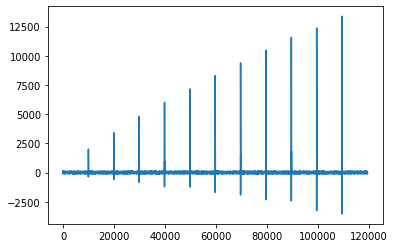

In [178]:
plt.plot(data)


In [117]:
sizeTD2

4982

In [30]:
import pyNMR.model.parser.rs2d as rs2d
from importlib import reload
reload(rs2d)

<module 'pyNMR.model.parser.rs2d' from '/Users/benno/Dropbox/Software/pyNMR/pyNMR/model/parser/rs2d.py'>

In [31]:
data = rs2d.RS2D("./19/")

(0, 100)

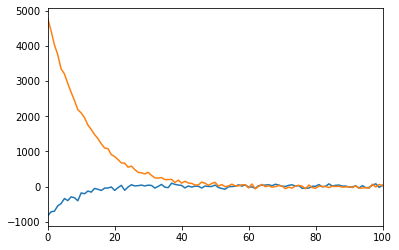

In [44]:
plt.plot(np.real(data.allFid[0][3]))
plt.plot(np.imag(data.allFid[0][3]))
plt.xlim(0, 100)

In [43]:
1 / data.sweepWidthTD2

9.984e-07